In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [9]:
df = pd.read_csv('/content/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
df.shape[0]

418

In [13]:
df.shape[1]

12

In [14]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [15]:
df.isnull().sum().values.sum()

414

In [16]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [19]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                     

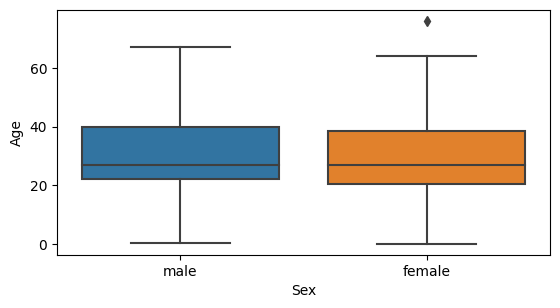

In [23]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Sex', y = 'Age',data= df)
plt.show()

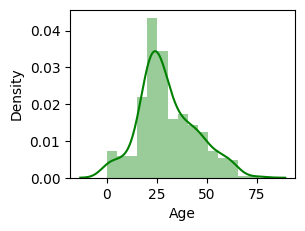

In [24]:
plt.subplot(2,2,3)
sns.distplot(df['Age'],color='g')
plt.show()

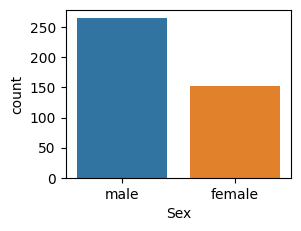

In [26]:
plt.subplot(2,2,4)
sns.countplot(x='Sex', data=df)
plt.show()

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
df.drop(columns=['PassengerId','Name','Embarked','Cabin'],inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [30]:
df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
dtype: int64

In [31]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [33]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

In [34]:
df[df['Age']>=50]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
2,0,2,male,62.0,0,0,240276,9.6875
13,0,2,male,63.0,1,0,24065,26.0000
20,0,1,male,55.0,1,0,PC 17603,59.4000
25,0,3,male,50.0,1,0,A/5. 3337,14.5000
30,0,2,male,50.0,1,0,SC/AH 3085,26.0000
48,1,1,female,60.0,0,0,11813,76.2917
69,1,1,female,60.0,1,4,19950,263.0000
77,1,1,female,55.0,2,0,11770,25.7000
81,0,1,male,67.0,1,0,PC 17483,221.7792
96,1,1,female,76.0,1,0,19877,78.8500


In [35]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,1,34.5,0,0,330911,7.8292
1,1,3,0,47.0,1,0,363272,7.0000
2,0,2,1,62.0,0,0,240276,9.6875
3,0,3,1,27.0,0,0,315154,8.6625
4,1,3,0,22.0,1,1,3101298,12.2875


In [37]:
df['Ticket'] = df['Ticket'].apply(lambda x: re.sub(r'\D', '', x))

In [38]:
x = df.drop(['Survived'],axis=1)
y = df['Survived']

In [39]:
x.head

<bound method NDFrame.head of      Pclass  Sex   Age  SibSp  Parch   Ticket      Fare
0         3    1  34.5      0      0   330911    7.8292
1         3    0  47.0      1      0   363272    7.0000
2         2    1  62.0      0      0   240276    9.6875
3         3    1  27.0      0      0   315154    8.6625
4         3    0  22.0      1      1  3101298   12.2875
..      ...  ...   ...    ...    ...      ...       ...
413       3    1  27.0      0      0    53236    8.0500
414       1    0  39.0      0      0    17758  108.9000
415       3    1  38.5      0      0  3101262    7.2500
416       3    1  27.0      0      0   359309    8.0500
417       3    1  27.0      1      1     2668   22.3583

[418 rows x 7 columns]>

In [40]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [45]:
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n")

Logistic Regression - Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        52
           1       0.00      0.00      0.00        32

    accuracy                           0.62        84
   macro avg       0.31      0.50      0.38        84
weighted avg       0.38      0.62      0.47        84


Decision Tree - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        32

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Random Forest - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        32

    accuracy